In [57]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### Read data from csv

In [58]:
data_train = pd.read_csv('train_test_data/train_data.csv')
data_test = pd.read_csv('train_test_data/test_data.csv')
data_train.head()

,ROM,Screen resolution,Price
0,0.077834,2.350538,16500.0
1,-0.929272,-1.311654,2690.0
2,-0.929272,-1.321882,2640.0
3,0.077834,0.382732,8490.0
4,-0.929272,0.382732,4190.0


### Data information

#### Data train information

In [59]:
data_train.head()

,ROM,Screen resolution,Price
0,0.077834,2.350538,16500.0
1,-0.929272,-1.311654,2690.0
2,-0.929272,-1.321882,2640.0
3,0.077834,0.382732,8490.0
4,-0.929272,0.382732,4190.0


- Data train has 1241 records
- No fields are null

#### Data test information

In [60]:
data_test.head()

,ROM,Screen resolution,Price
0,0.077834,0.382732,6152
1,0.077834,0.008132,8990
2,0.077834,0.382732,8190
3,-1.934410,0.008132,450
4,2.092044,0.008132,18750


- Data test has 533 records
- No fields are null

### Modeling Train Data

#### Get x_train and y_train in data_train


In [61]:
x_train = data_train.drop('Price', axis=1)
x_train

,ROM,Screen resolution
0,0.077834,2.350538
1,-0.929272,-1.311654
2,-0.929272,-1.321882
3,0.077834,0.382732
4,-0.929272,0.382732
...,...,...
1331,1.588491,1.536841
1332,0.077834,0.392960
1333,-1.873433,-2.594660
1334,1.588491,0.382732


In [62]:
y_train = data_train['Price']
y_train

0       16500.0
1        2690.0
2        2640.0
3        8490.0
4        4190.0
         ...   
1331    36990.0
1332     5790.0
1333      890.0
1334    23000.0
1335      590.0
Name: Price, Length: 1336, dtype: float64

#### Get x_test and y_test in data_test

In [63]:
x_test = data_test.drop(['Price'], axis=1)
x_test

,ROM,Screen resolution
0,0.077834,0.382732
1,0.077834,0.008132
2,0.077834,0.382732
3,-1.934410,0.008132
4,2.092044,0.008132
...,...,...
329,-1.432824,-1.321882
330,-0.929272,-1.321882
331,0.077834,0.382732
332,-1.873433,-2.594660


In [64]:
y_test = data_test['Price']
y_test

0       6152
1       8990
2       8190
3        450
4      18750
       ...  
329     2950
330     4290
331     8190
332      890
333    16990
Name: Price, Length: 334, dtype: int64

#### Creating and Modeling using Linear Regression

In [65]:
lrg = LinearRegression()

In [66]:
lrg.fit(x_train, y_train)

LinearRegression()

In [67]:
y_pred = lrg.predict(x_test)

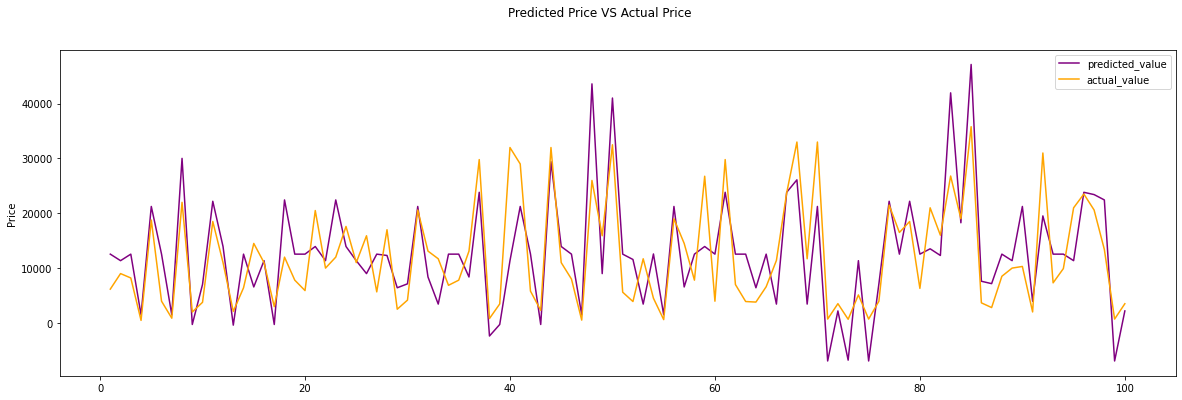

In [68]:
def plot_residuals(y_test, y_pred):
  indexes = list(range(1, len(y_pred)+1))[:100]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, y_pred[:100], label='predicted_value', color='purple')
  axs.plot(indexes, y_test[:100], label='actual_value', color='orange')
  axs.legend()
  axs.set_ylabel('Price')
  fig.suptitle('Predicted Price VS Actual Price')
  plt.show()

plot_residuals(y_test, y_pred)

In [69]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def accuracy_score(y_test, y_pred, algorithm):
  R2 = r2_score(y_test, y_pred)
  cross_val = cross_val_score(algorithm, x_train, y_train, cv=5)

  r2 = []
  r2.append(R2)

  CV = []
  CV.append(cross_val.mean())

  print("r_2 score:", R2, "\n")
  print("CV scores:", cross_val, "\n")
  print("CV scores mean:", cross_val.mean())

accuracy_score(y_test, y_pred, lrg)

r_2 score: 0.3024805358906566 

CV scores: [0.54730468 0.61517569 0.56752772 0.54950697 0.52208051] 

CV scores mean: 0.5603191143750145


In [70]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

In [71]:
parameter_grid = {
  'n_estimators': n_estimators,
  'max_depth':max_depth,
  'learning_rate':learning_rate,
  'min_child_weight':min_child_weight,
  'booster':booster,
  'base_score':base_score
}

In [72]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5,
            return_train_score = True,
            random_state=42)

In [73]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter

In [74]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=1100,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [75]:
random_cv.best_params_

{'n_estimators': 1100,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.75}

In [76]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=4,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

In [77]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [78]:
y_pred_advanced = regressor.predict(x_test)

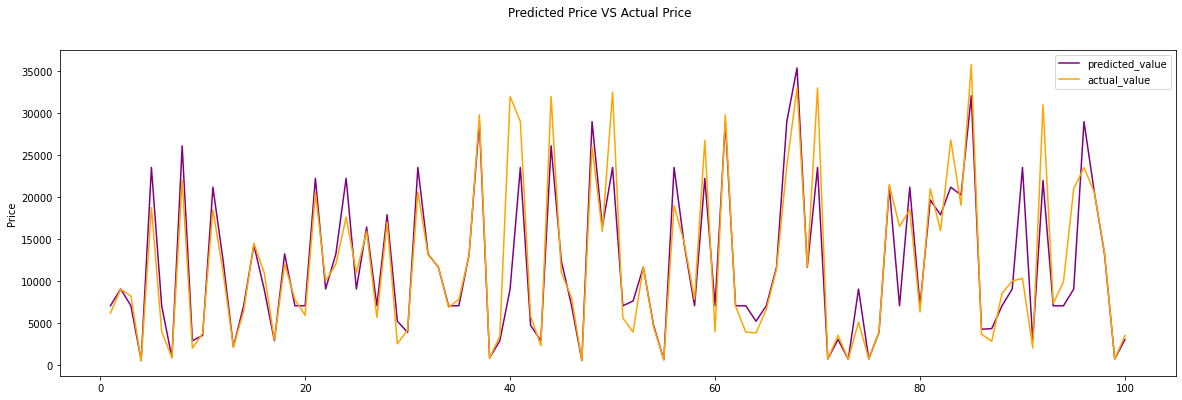

In [79]:
plot_residuals(y_test, y_pred_advanced)

In [80]:
accuracy_score(y_test, y_pred_advanced, regressor)

r_2 score: 0.8698670289251702 

CV scores: [0.8595438  0.868804   0.86607584 0.8772267  0.87557458] 

CV scores mean: 0.8694449829488826
